# Predicting Inland Empire Warehouse Growth

### UDS Final Project -  Lucy Briggs, Carolyn Pugh, Monisha Reginald, Alyssa Suzukawa

### Research Question:
#### If warehouses continue growing at the same rate in Southern California, what will the region look like by the year 2030?
Warehouses have been rapidly expanding in the Inland Empire, and have significant environmental justice implications. We wanted to understand where, based on trends from 2010-2020, future warehouses might be built in San Bernardino and Riverside, California. To do this, we collected data that might be related to warehouse siting, such as land values, existing warehouse locations, distance to major roadways, and local demographics. We then used machine learning to train models for predicting the probability that a warehouse will be built on a land parcel by 2030. 

### Overview of Notebook:
Section 1. Data Collection & Cleaning

Section 2. Random Forest Models

Section 3. Neural Network Models

Section 4. Discussion of Results


## Data Collection & Cleaning

#### Parcel Data (Lucy to fill in this section & link to data/prep notebooks) 
[Initial Data Cleaning for Riverside Parcel Data](https://github.com/monishareginald/uds-warehouse-project/blob/main/riversidegeom.ipynb)<br>
[Data Wrangling Notebook](https://github.com/monishareginald/uds-warehouse-project/blob/main/Assessor%20Parcel%20Data%20Wrangling%20with%20Freight%20and%20Warehouses.ipynb)<br>
Data Sources: Assessor Parcel Data from [San Bernardino Open Data Portal](https://open.sbcounty.gov/datasets/countywide-parcels/about) and [Riverside County GIS](https://gis.rivco.org/pages/data-distribution)<br>
![title](figures/parcel_clipping.png)

#### Warehouse Data
[Data Wrangling Noteboook](https://github.com/monishareginald/uds-warehouse-project/blob/main/Assessor%20Parcel%20Data%20Wrangling%20with%20Freight%20and%20Warehouses.ipynb)<br>
Data Source: [Warehouse CITY data on warehouse APNs and year built](https://radicalresearch.shinyapps.io/WarehouseCITY/)<br>
* First, we created a dataset of warehouses that contained one row per APN. Through exploratory mapping and a review of the counties' Zoning District Maps, we determined that duplicated APNs in the dataset represented parcels with multiple subdivisions that each had warehouses located on them. We wanted our analysis to take place at the parcel level, so we used groupby to aggregate our data with the appropriate functions (i.e. the minimum "year" to represent the first year that a warehouse was built on the parcle, but the sum of "sqft" to represent the total square footage of all warehouses built within a single parcel.  
* Next, we used a series of lambda functions to create boolean variables that noted whether a parcel had a warehouse on it at the start of 2010, whether the parcel had a waterhouse on it at the start of 2020, and whether a warehouse was specifically built during the 2010s (the dependent variable we used to train our machiene learning models).

In [1]:
#Add Alyssa's map of current warehouse locations here

#### Distance to Freight Network
[Data Wrangling Noteboook](https://github.com/monishareginald/uds-warehouse-project/blob/main/Assessor%20Parcel%20Data%20Wrangling%20with%20Freight%20and%20Warehouses.ipynb)<br>
Data Source: [Shapefile of National Highway Freight Network from Federal Highway Administration ](https://fpcb.ops.fhwa.dot.gov/tools_nhfn.aspx)<br>
Here, we used the geopandas function [sjoin_nearest](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin_nearest.html) to calculate the distance between each parcel and the NHFN. The map below displays the results.<br>
![title](figures/freight.png)

#### SCAG Data (Alyssa to fill in this section & link to data/prep notebooks) 


#### Census Data  
[Notebook for 2009 Data](https://github.com/monishareginald/uds-warehouse-project/blob/main/Census-2009-final.ipynb)<br>
[Notebook for 2019 Data](https://github.com/monishareginald/uds-warehouse-project/blob/main/Census-2019.ipynb)<br>
Data Source: [American Community Survey (5 year estimates) for 2009 and 2019](https://www.census.gov/programs-surveys.html)<br>
* used cenpy and API to pull variables for race, homeownership, education, income, and occupation
* merged tables and variables for both counties and added census tract geometries

#### Joins
*** ALYSSA TO FILL IN PART ABOUT JOINING SCAG TO WAREHOUSE DATA *** <br>
[Notebook to Create Final 2010 Data](https://github.com/monishareginald/uds-warehouse-project/blob/main/Spatial%20Join%202010%20Data.ipynb)<br>
[Notebook to Create Final 2020 Data](https://github.com/monishareginald/uds-warehouse-project/blob/main/Spatial%20Join%202020%20Data.ipynb)<br>
* *** ALYSSA TO FILL IN PART ABOUT JOINING SCAG TO WAREHOUSE DATA ***
* Next, we created two separate datasets for 2010 and 2020 that incoorporated information about the Census tract that each parcel was located. To speed up this process, we:
    - Created a parcel geodataframe with just each APN and its geometry
    - Converted each parcel's geometry to its centroid
    - Created a census geodataframe with just each census tract's GEOID and geometry
    - Performed a spatial join to create a crosswalk that matched each APN with the GEOID of the census tract that its centroid falls within
    - Used this crosswalk to do an index join on APN to add the appropriate GEOID for each parcel to the original parcel data
    - Used this crosswalk to do an index join on GEOID to add the census information into the parcel data

## Random Forest Models

Our goal was to develop a Random Forest Model that would predict whether or not a parcel would develop into a warehouse within 10 years. We could thereby train our model on dataset representing conditions in 2010, with the benefit of knowing whether or not a warehouse _did_ develop by 2020 and apply this model to a dataset representing conditions in 2020 to predict which parcels are most likely o develop into warehouses by 2030.

### Random Forest without Census Data (Monisha)

In [9]:
#### link to prep notebook, discuss results, add png of feature importances figure & confusion matrix

### Random Forest with Census Data (Lucy)

In [11]:
#### link to prep notebook, discuss methods/results, add png of feature importances figure & confusion matrix

## Neural Networks (Carolyn)

[Notebook](https://github.com/monishareginald/uds-warehouse-project/blob/main/Neuralnetprep.ipynb)<br>

We wanted to see how a neural network model compared to our initial random forest model. To do this, we started with our dataframe of parcel level data, which we standardized and used to train a neural network model.  Like the random forest model, we trained the neural network model using 2010 data to predict whether or not a warehouse would be built on a parcel by 2020.  We then applied the model to 2020 data to predict which parcels will have warehouses built on them by 2030.  The results from the neural network model were simliar to that of the random forest model.

From the 2010 training data, the neural network model's predicted fraction of parcels with a warehouse by 2020 was 0.0002, and the actual fraction of parcels with a warehouse was 0.0003.  The confusion matrix is below - it is fairly similar to the results from the random forest.

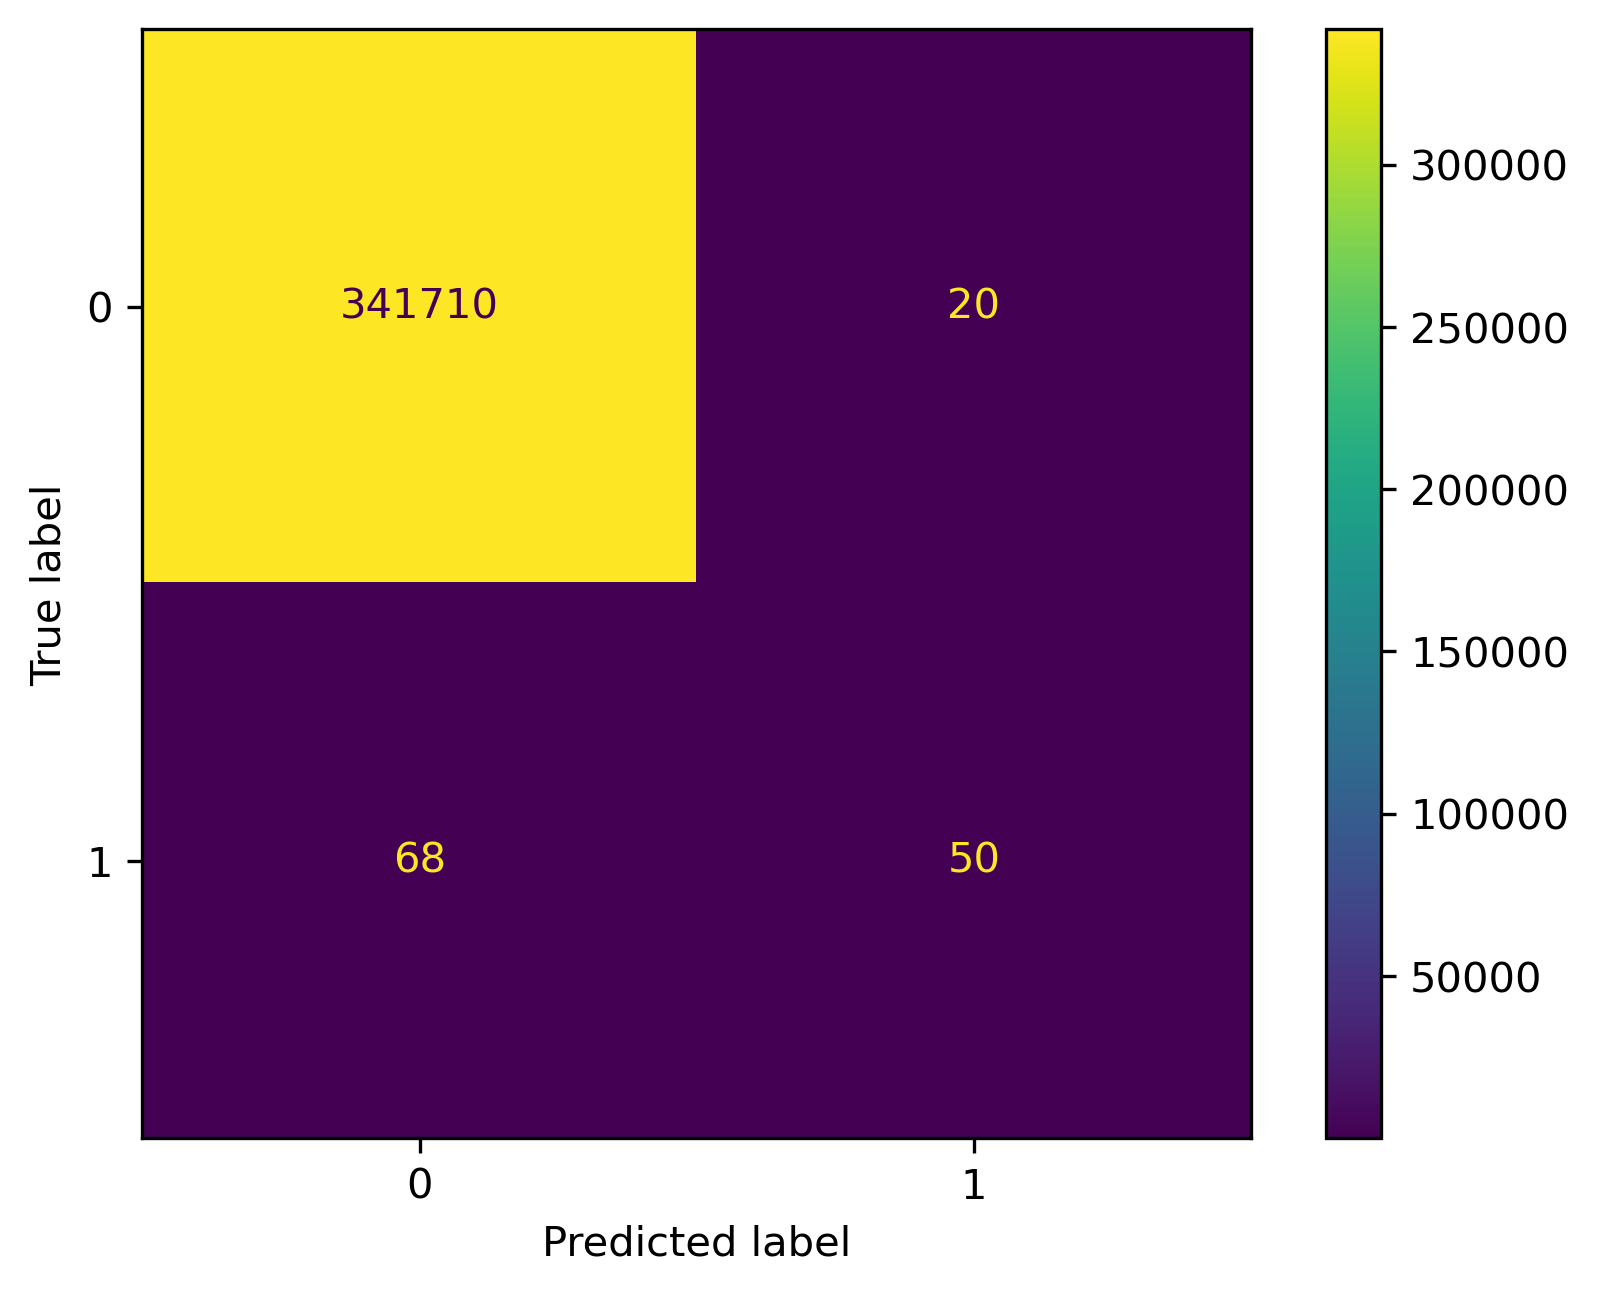

In [3]:
from PIL import Image
Image.open('figures/confusion_matrix_Neuralnet.png')

When the neural network model was applied to 2020 data to make predictions about warehouse locations in 2030, it predicted 96 new warehouses. 

Because the results were not meaningfully different than the random forest model, we decided to continue with the random forests rather than continue trying diffent iterations of neural networks

# Discussion of Results (Alyssa)

## Visualizations to make (Alyssa)

1. 2010 & 2020 Warehouse Locations (maybe over income/race demographics, or CalEnviroscreen?)

2. Using the 'best' model: (likely the random forest  top 20 feature importance one):

        -Predicted 2030 Warehouse Locations 

        -Places that are above a 25% or 50% chance 2030 Warehouse Locations

        -layer with CalEnviroscreen index (already read this in for lecture/class, alternatively could use demographics we have in census data)


